In [5]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
from sklearn import datasets, linear_model
%matplotlib inline

In [6]:
df = pd.read_excel('C:/Users/RicardoEsquivel/Desktop/Estadistica/Estadistica/Ejercicio_2.3.xlsx')
df.head()

,Observation,Velocidad,Contenido
0,1,125.3,77.9
1,2,98.2,76.8
2,3,201.4,81.5
3,4,147.3,79.8
4,5,145.9,78.2


In [7]:
#Reportabilidad de estadísticas
df.describe()

,Observation,Velocidad,Contenido
count,20.00000,20.000000,20.00000
mean,10.50000,140.895000,78.74000
std,5.91608,31.557658,1.44783
min,1.00000,75.100000,76.70000
25%,5.75000,123.575000,77.80000
50%,10.50000,145.000000,78.45000
75%,15.25000,159.525000,79.82500
max,20.00000,201.400000,81.50000


# Gráfico de dispersión

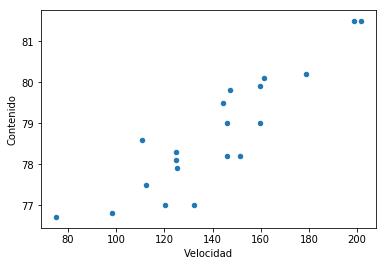

In [8]:
#Grafico de dispersión
df.plot.scatter('Velocidad', 'Contenido')

# Estaimación de la recta de regresión

In [9]:
lr = linear_model.LinearRegression()

In [10]:
X = df['Velocidad'].values.reshape(-1,1)
y = df['Contenido'].values.reshape(-1,1)

In [11]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
slope = lr.coef_
intercept = lr.intercept_

print ('La recta de regresión es: y = %f + %f * X'%(lr.intercept_, slope))

La recta de regresión es: y = 72.958547 + 0.041034 * X


### La recta de regresión es: y = 72.958547 + 0.041034 * X

# Tabla ANOVA

In [13]:
#TABLA ANOVA
resultado = smf.ols('Contenido ~ Velocidad', data=df).fit()
#resultado.summary()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:              Contenido   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     71.97
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           1.05e-07
Time:                        12:55:30   Log-Likelihood:                -19.176
No. Observations:                  20   AIC:                             42.35
Df Residuals:                      18   BIC:                             44.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.9585      0.698    104.596      0.0

# MSE del error

In [54]:
resultado.mse_resid

0.44266587837667043

# Coeficiente de correlación y valor P

In [55]:
st.pearsonr(df['Velocidad'].values, df['Contenido'].values)

(0.8943937036608856, 1.0517201166338551e-07)

# Regresión, Intervalo de confianza y de predicción

In [56]:
x_val = np.linspace(df['Velocidad'].min(), df['Velocidad'].max(), 100)
pr = resultado.get_prediction({'Velocidad': x_val})

Text(0,0.5,'Contenido')

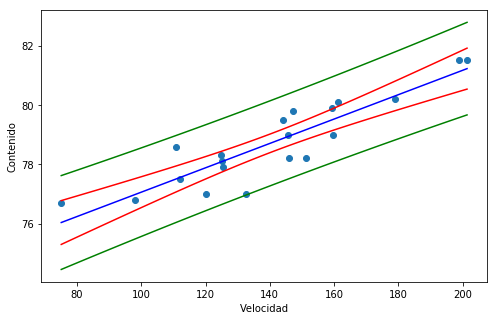

In [57]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.scatter(df['Velocidad'].values, df['Contenido'].values)
ax.plot(x_val,pr.conf_int(obs=True), color='green')
ax.plot(x_val,pr.conf_int(), color='red')
ax.plot(x_val,pr.predicted_mean, color='blue')
ax.set_xlabel('Velocidad')
ax.set_ylabel('Contenido')

# Análisis de los residuos

In [58]:
resultado.resid

0    -0.200078
1    -0.188063
2     0.277252
3     0.797179
4    -0.745374
5     0.224542
6    -0.062536
7    -0.890806
8     0.526809
9    -0.099488
10    0.396567
11    0.058729
12    0.659817
13   -0.971060
14    0.624383
15    0.012232
16    0.383940
17   -1.395522
18   -0.507537
19    1.099015
dtype: float64

In [59]:
resultado.resid_pearson

array([-0.30071984, -0.28266092,  0.41671225,  1.19816786, -1.12030488,
        0.33748881, -0.09399221, -1.33889085,  0.79179984, -0.14953214,
        0.59604388,  0.08827083,  0.99171164, -1.45951288,  0.93845471,
        0.01838448,  0.57706512, -2.09748328, -0.76283287,  1.65183047])

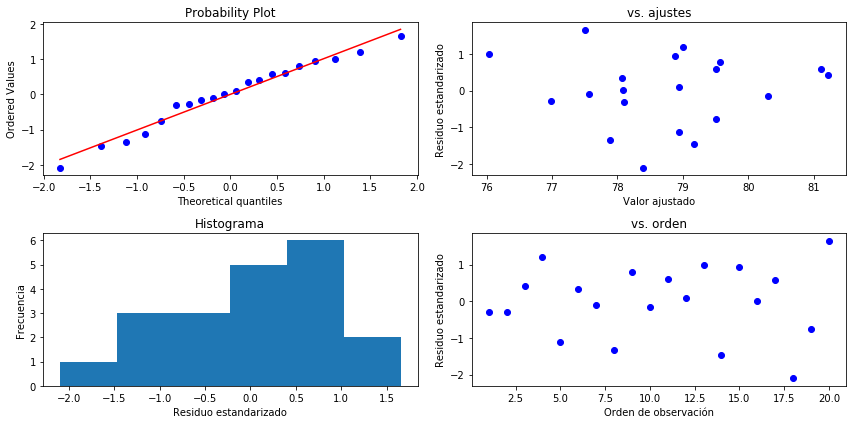

In [111]:
# figura que tendrá los gráficos
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(221)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Valor ajustado')
ax.set_ylabel('Residuo estandarizado')
ax.set_title('vs. ajustes')

ax = fig.add_subplot(223)
ax.hist(resultado.resid_pearson, bins=6)
ax.set_xlabel('Residuo estandarizado')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma')

ax = fig.add_subplot(224)
ax.scatter(df['Observation'], resultado.resid_pearson, color='blue')
ax.set_xlabel('Orden de observación')
ax.set_ylabel('Residuo estandarizado')
ax.set_title('vs. orden')

plt.tight_layout()